In [1]:
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile

url_zip = "https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_usu_4_Trim_2021_txt.zip"
           
http_response = urlopen(url_zip)
zipfile = ZipFile(BytesIO(http_response.read()))

archivo_txt = zipfile.open("EPH_usu_4_Trim_2021_txt/usu_individual_T421.txt")

import pandas as pd
df = pd.read_csv(archivo_txt, sep=";")

/tmp/ipykernel_1387509/1531337231.py:13: DtypeWarning: Columns (102) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(archivo_txt, sep=";")


In [2]:
columna_edad = "CH06"
columna_educacion = "NIVEL_ED" # 6 
columna_ocup = "CAT_OCUP" # 3
columna_ingresos = "P47T"

In [3]:
# ajuste_inflacion = 85.02/67.73
# ajuste_inflacion

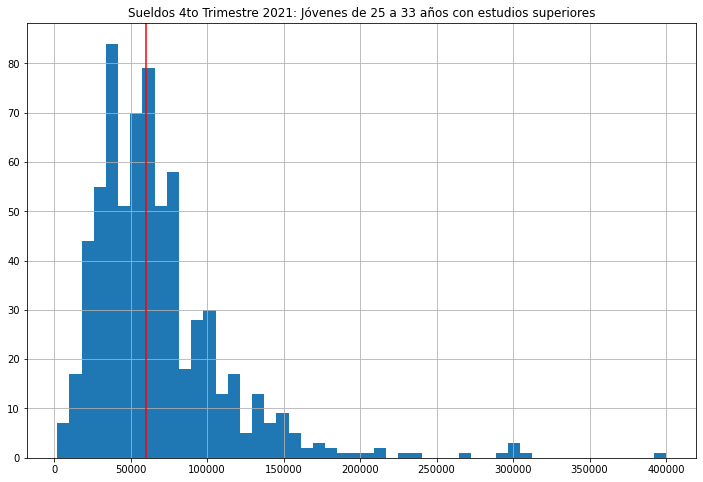

In [4]:
filtro_edad = (25 <= df[columna_edad]) & (33 >= df[columna_edad])
filtro_educ = df[columna_educacion] == 6
filtro_ocup = df[columna_ocup] == 3
filtro_ingresos_positivos = df[columna_ingresos ] >0

df_jovenes = df[filtro_educ & filtro_edad & filtro_ocup & filtro_ingresos_positivos][columna_ingresos]
ax = df_jovenes.hist(bins=50, figsize=(12, 8))
ax.set_title("Sueldos 4to Trimestre 2021: Jóvenes de 25 a 33 años con estudios superiores")
ax.axvline(df_jovenes.median(), color="red")

In [5]:
print(df_jovenes.median())

60000.0


In [6]:
df

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
0,TQRMNOPPQHMOLPCDEGNFJ00714305,2021,4,1,4,1,44,N,17,309,...,9.0,7,33500,6,7.0,5,NaN,7.0,5,411
1,TQRMNOQPYHKMPUCDEIJAH00663642,2021,4,1,1,1,1,S,33,1573,...,NaN,4,32000,6,NaN,6,6.0,NaN,6,2285
2,TQRMNOQPYHKMPUCDEIJAH00663642,2021,4,1,2,1,1,S,33,1573,...,NaN,4,32000,6,NaN,6,6.0,NaN,6,2285
3,TQRMNOQYRHMOQRCDEIJAH00718661,2021,4,1,1,1,1,S,33,2635,...,NaN,12,0,12,NaN,12,12.0,NaN,12,0
4,TQRMNOPSTHMMLPCDEFMDB00713515,2021,4,1,2,1,43,N,6,87,...,7.0,7,43000,7,8.0,8,NaN,8.0,8,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50149,TQRMNOQTTHMNLMCDEGJBF00712857,2021,4,1,1,1,43,S,13,517,...,NaN,6,41500,7,8.0,7,7.0,NaN,7,554
50150,TQRMNOQTTHMNLMCDEGJBF00712857,2021,4,1,2,1,43,S,13,517,...,NaN,6,41500,7,8.0,7,7.0,NaN,7,554
50151,TQRMNOQTUHKNKUCDEFJAH00665934,2021,4,1,1,1,43,N,3,232,...,4.0,4,51000,8,9.0,8,NaN,9.0,8,336
50152,TQRMNOPVWHKMLMCDEFJAH00659534,2021,4,1,1,1,43,N,3,299,...,4.0,4,"16666,67",3,3.0,2,NaN,3.0,2,659


In [7]:
for ponderador in ["Pondih","Pondii","Pondiio", "Pondera"]:
  ponderador = ponderador.upper()
  df_jovenes_weighted = df[filtro_educ & filtro_edad & filtro_ocup & filtro_ingresos_positivos][[columna_ingresos, ponderador]]

  df_jovenes_weighted.sort_values(columna_ingresos, inplace=True)
  cumsum = df_jovenes_weighted[ponderador].cumsum()
  #print(cumsum.iloc[-1])
  cutoff = df_jovenes_weighted[ponderador].sum() *.5
  median = df_jovenes_weighted[columna_ingresos][cumsum >= cutoff].iloc[0]
  print(ponderador, ":", median)

PONDIH : 65000.0
PONDII : 65000.0
PONDIIO : 65000.0
PONDERA : 64000.0


In [8]:
ponderador = "Pondii".upper()
ponderador

'PONDII'

PONDII : 65000.0


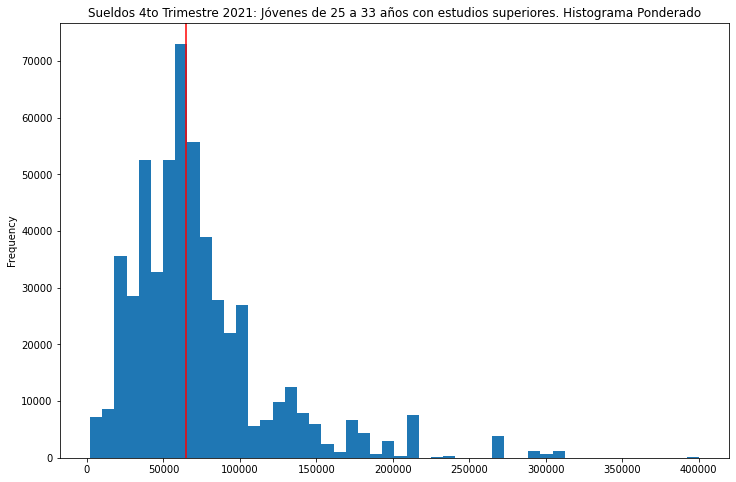

In [9]:
ponderador = "Pondii".upper()
df_jovenes_weighted = df[filtro_educ & filtro_edad & filtro_ocup & filtro_ingresos_positivos][[columna_ingresos, ponderador]]
df_jovenes_weighted.sort_values(columna_ingresos, inplace=True)
ax = df_jovenes_weighted[columna_ingresos].plot(kind="hist", weights=df_jovenes_weighted[ponderador],bins=50, figsize=(12, 8))
ax.set_title("Sueldos 4to Trimestre 2021: Jóvenes de 25 a 33 años con estudios superiores. Histograma Ponderado")
cumsum = df_jovenes_weighted[ponderador].cumsum()
cutoff = df_jovenes_weighted[ponderador].sum() *.5
median = df_jovenes_weighted[columna_ingresos][cumsum >= cutoff].iloc[0]
print(ponderador, ":", median)
ax.axvline(median, color="red")

In [10]:
# costo_metro_cuadrado = 350000
costo_metro_cuadrado = 65000

In [11]:
print(f"Sueldo anual en metros cuadrados: {df_jovenes.median()*12/costo_metro_cuadrado:.2f} metros cuadrados por año")
print(f"Años de sueldo para comprar un dos ambientes de 30m2: {costo_metro_cuadrado*30/(df_jovenes.median()*12):.2f} años")

Sueldo anual en metros cuadrados: 11.08 metros cuadrados por año
Años de sueldo para comprar un dos ambientes de 30m2: 2.71 años


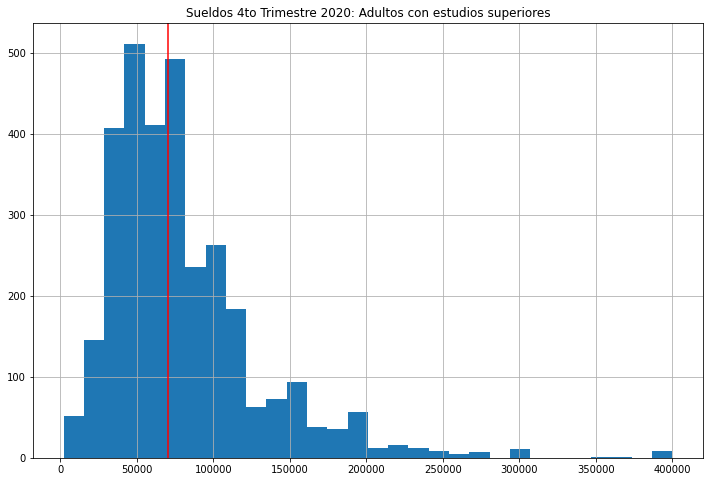

In [12]:
df_adultos = df[filtro_educ & filtro_ocup & filtro_ingresos_positivos][columna_ingresos]
ax = df_adultos.clip(0, 400000).hist(bins=30, figsize=(12, 8))
ax.set_title("Sueldos 4to Trimestre 2020: Adultos con estudios superiores")
ax.axvline(df_adultos.median(), color="red")

In [13]:
df_adultos.median()

70000.0

In [14]:
print(f"Sueldo anual en metros cuadrados: {df_adultos.median()*12/costo_metro_cuadrado:.2f} metros cuadrados por año")
print(f"Años de sueldo para comprar un dos ambientes de 30m2: {costo_metro_cuadrado*30/(df_adultos.median()*12):.2f} años")

Sueldo anual en metros cuadrados: 12.92 metros cuadrados por año
Años de sueldo para comprar un dos ambientes de 30m2: 2.32 años


# Analisis II

In [15]:
df.shape

(50154, 177)

La variable _pondera_ es la que indica, para cada registro, a cuantos representa.

In [16]:
df['PONDERA'].sum()

29006368

##### Género 

In [17]:
df['CH04'].value_counts()

2    26096
1    24058
Name: CH04, dtype: int64

In [18]:
df.groupby('CH04')['PONDERA'].sum()


CH04
1    14107115
2    14899253
Name: PONDERA, dtype: int64

In [19]:
df['CH04'].value_counts(normalize = True)

2    0.520317
1    0.479683
Name: CH04, dtype: float64

In [20]:
df.groupby('CH04')['PONDERA'].sum()/df['PONDERA'].sum()

CH04
1    0.486345
2    0.513655
Name: PONDERA, dtype: float64

##### Empleo 

![ESTADO](estado.png)

In [21]:
df.groupby('ESTADO')['PONDERA'].sum()/df['PONDERA'].sum()

ESTADO
0    0.003017
1    0.435890
2    0.032642
3    0.381976
4    0.146474
Name: PONDERA, dtype: float64

In [22]:
# Desempleo
des = df.groupby('ESTADO')['PONDERA'].sum()[2]
# des2 = des/pea
# des2

NameError: name 'pea' is not defined

In [ ]:
# Empleo
emp = df.groupby('ESTADO')['PONDERA'].sum()[1]
emp2 = emp/pea
emp2

In [ ]:
#PEA
pea = des + emp
pea

#####  Salario ocupación principal

In [ ]:
# Salario de la ocupación principal
df['P21'].describe()

In [ ]:
# Media ponderada
(df['P21']*df['PONDERA']).sum()/df['PONDERA'].sum()

In [ ]:
import numpy as np
np.sum(df['P21']*df['PONDERA'])/df['PONDERA'].sum()

In [ ]:
np.average(df['P21'], axis = 0, weights = df['PONDERA'])

In [ ]:
# https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html
from statsmodels.stats.weightstats import DescrStatsW

In [ ]:
dfw = DescrStatsW(df['P21'], weights = df['PONDERA'])

In [ ]:
dfw.mean

In [ ]:
dfw.std

In [ ]:
dfw.quantile([.01, .05, .1, .25, .5, .9, .95, .99])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(df['P21'], bins = 2)
plt.show();

In [ ]:
df1 = df.loc[(df['P21']>0) & (df['P21']>200000)]

In [ ]:
plt.hist(df1['P21']);

In [ ]:
df1['LP21'] = np.log(df['P21'])
plt.hist(df1['LP21']);

In [ ]:
df1['LP21'].plot.hist(density = True,bins= 20)

In [ ]:
df1['LP21'].plot.kde()
df1['LP21'].plot.hist(density = True,bins= 20)

In [ ]:
# Histograma ponderado
(df1['P21']*df1['PONDERA']/df1['PONDERA'].sum()).plot.hist(density = True, bins= 10)

In [ ]:
# Analisis bivariados
# Sexo y edad
pd.crosstab(index= df['CH04'], columns=df['ESTADO'], margins = True, dropna = False)

In [ ]:
pd.crosstab(index= df['CH04'], columns=df['ESTADO'], margins = True, dropna = False, normalize = 'columns')

In [ ]:
pd.crosstab(df['CH04'], df['ESTADO'],df['PONDERA'], aggfunc = sum, dropna = False, normalize = 'columns')

In [ ]:
# Curva de Lorenz

In [ ]:
df_lor = df.sort_values(by='P21')

In [ ]:
df_lor['PobAcum'] = df_lor['PONDERA'].cumsum()

In [ ]:
df_lor['PobAcum'] = df_lor['PobAcum'] /df_lor['PobAcum'].iat[-1]

In [ ]:
df_lor['IngAcum'] = (df_lor['P21']*df_lor['PONDERA']).cumsum()

In [ ]:
df_lor['IngAcum'] = df_lor['IngAcum'] / df_lor['IngAcum'].iat[-1]

In [ ]:
fig, ax = plt.subplots(figsize = [10,10])
ax.scatter(df_lor['PobAcum'], df_lor['IngAcum'], color = 'b', s=1)
ax.plot([0,1],[0,1], color = 'r')

In [ ]:
df_lor.loc[df_lor['PobAcum']< 0.2, 'quintil'] = 1
df_lor.loc[(df_lor['PobAcum']> 0.2) & (df_lor['PobAcum']<= 0.4), 'quintil'] = 2
df_lor.loc[(df_lor['PobAcum']> 0.4) & (df_lor['PobAcum']<= 0.6), 'quintil'] = 3
df_lor.loc[(df_lor['PobAcum']> 0.6) & (df_lor['PobAcum']<= 0.8), 'quintil'] = 4
df_lor.loc[(df_lor['PobAcum']> 0.8) & (df_lor['PobAcum']<= 1), 'quintil'] = 5

In [ ]:
df_lor[['PobAcum','quintil']]

In [ ]:
df_lor.groupby('quintil').apply(lambda x: (x['P21']*x['PONDERA']).sum()/x['PONDERA'].sum())

In [ ]:
# GINI
# Filtramos los ingresos negativos
gini = df
gini = df.drop(df[(df['P21']<=0)].index)


